In [2]:
import os
import time
import numpy as np
import random
import sys
import netCDF4 as ncdf

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter , LatitudeFormatter

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# DJF_precip = np.mean(precip[:, winter_months, :, :], axis=1)
# JJA_precip = np.mean(precip[:, summer_months, :, :], axis=1)
# ANN_precip = precip.mean(axis=1)
# DJF_precip = np.load("./mean_precip_npys/DJF_precip.npy")
# JJA_precip = np.load("./mean_precip_npys/JJA_precip.npy")
# ANN_precip = np.load("./mean_precip_npys/ANN_precip.npy")

DJF_precip = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/precip/DJF_precip.npy")
JJA_precip = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/precip/JJA_precip.npy")
ANN_precip = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/precip/ANN_precip.npy")

print(DJF_precip.shape)
print(JJA_precip.shape)
print(ANN_precip.shape)

(6, 96, 144)
(6, 96, 144)
(6, 96, 144)


In [36]:
def plot_single_precip(fig, gs, subfig_index, precip, color_interval, title_font, expname, mean, rmse):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree(central_longitude = 0)

    axs = fig.add_subplot(gs[i, j], projection = ccrs.Robinson(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    axs.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    #cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.rainbow, extend='both', transform = prj)
    axs.tick_params(labelsize = 7)

    title_left = "{}) {} rmse = {:.3f}".format(chr(subfig_index + 96), expname, rmse)
    #title_right = "mean = {:.3f} rmse = {:.3f}".format(mean, rmse)
    title_right = ""
    axs.set_title(title_left,  title_font, loc = "left")
    axs.set_title(title_right, title_font, loc = "right")
    
    return {'fig': fig, 'axs': axs, "cs0": cs0} #, 'cax': cax}

In [43]:
def plot_single_precip_diff(fig, gs, subfig_index, precip, color_interval, title_font, expname, mean, rmse):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree(central_longitude = 0)

    axs = fig.add_subplot(gs[i, j], projection = ccrs.Robinson(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    axs.add_feature(cfeat.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    #cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    axs.tick_params(labelsize = 7)

    title_left = "{}) {} rmse = {:.3f}".format(chr(subfig_index + 96), expname ,rmse)
    # title_right = "rmse = {:.3f}".format(rmse)
    title_right = ""
    axs.set_title(title_left,  title_font, loc = "left")
    axs.set_title(title_right, title_font, loc = "right")
    
    return {'fig': fig, 'axs': axs, "cs0": cs0} #, 'cax': cax}

In [37]:
def subtitle_val(diag_cp, target_cp):
    
    mean = np.mean(diag_cp)
    rmse = np.sqrt(mean_squared_error(diag_cp, target_cp))
       
    return mean, rmse

In [12]:
all_precip = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/precip/all_precip.npy")

In [13]:
expname = ["SPCAM", "Wang2022", "Wang2023(PhysC)", "CAM5", "Ours(Seed1117)", "Ours(Seed1)"]#, "new50_rh1d"]

In [14]:
print(all_precip.shape)

(6, 72, 96, 144)


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_92263/3810327160.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


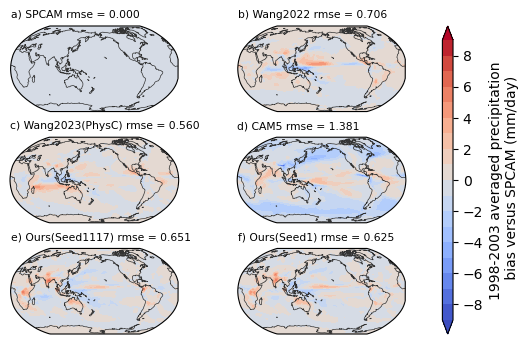

In [46]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.1, hspace=0.3)
# color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
color_interval = list(np.arange(-9,10,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(3):
    for j in range(2):
        mean, rmse = subtitle_val(all_precip[i*2+j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, \
            all_precip[i*2+j].mean(axis=0)-all_precip[0].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
cbar = fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
cbar.set_label("1998-2003 averaged precipitation\n bias versus SPCAM (mm/day)")

plt.tight_layout()
plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_92263/2787444991.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


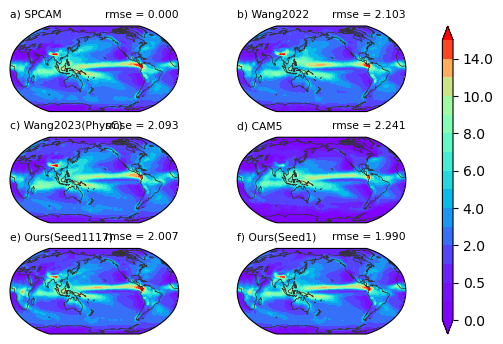

In [28]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.1, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(3):
    for j in range(2):
        mean, rmse = subtitle_val(all_precip[i*2+j].flatten(), all_precip[0].flatten())
        plot = plot_single_precip(fig, gs, i*2+j+1, all_precip[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

plt.tight_layout()
plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/3892307215.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


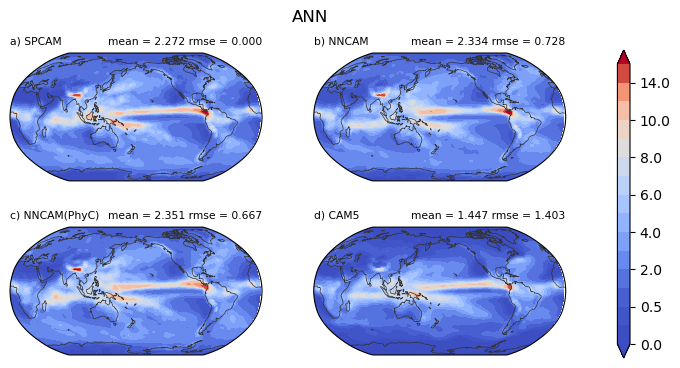

In [16]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(all_precip[i*2+j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip(fig, gs, i*2+j+1, all_precip[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN")
plt.tight_layout()
plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/3892307215.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


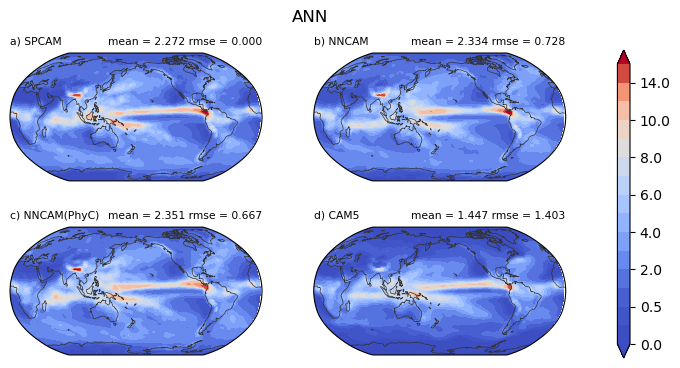

In [ ]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(all_precip[i*2+j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip(fig, gs, i*2+j+1, all_precip[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN")
plt.tight_layout()
plt.savefig('ann-multi_precipitation_plot.pdf')

In [111]:
new_precip = np.load("./new_mean_npys/all_precip.npy")
new_djf = np.load("./new_mean_npys/DJF_precip.npy")
new_jja = np.load("./new_mean_npys/JJA_precip.npy")

In [112]:
print(new_precip.shape)

(4, 12, 96, 144)


row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1
2
3


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/4243852090.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


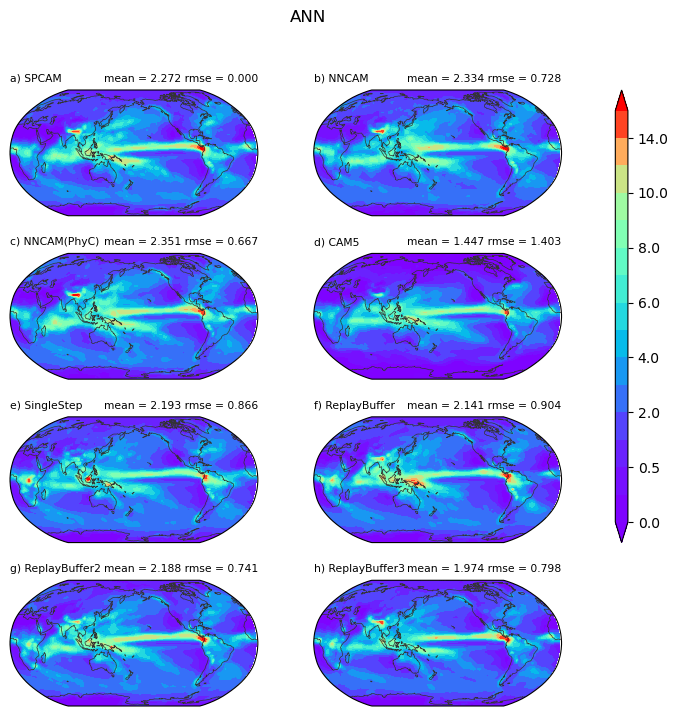

In [115]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2", "ReplayBuffer3"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(all_precip[i*2+j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip(fig, gs, i*2+j+1, all_precip[i*2+j].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_precip[j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip(fig, gs, i*2+j+1, new_precip[j].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        # j = 0
        ji = 2+j
        print(ji)
        mean, rmse = subtitle_val(new_precip[ji].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip(fig, gs, i*2+j+1, new_precip[ji].mean(axis=0), color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/3719728612.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


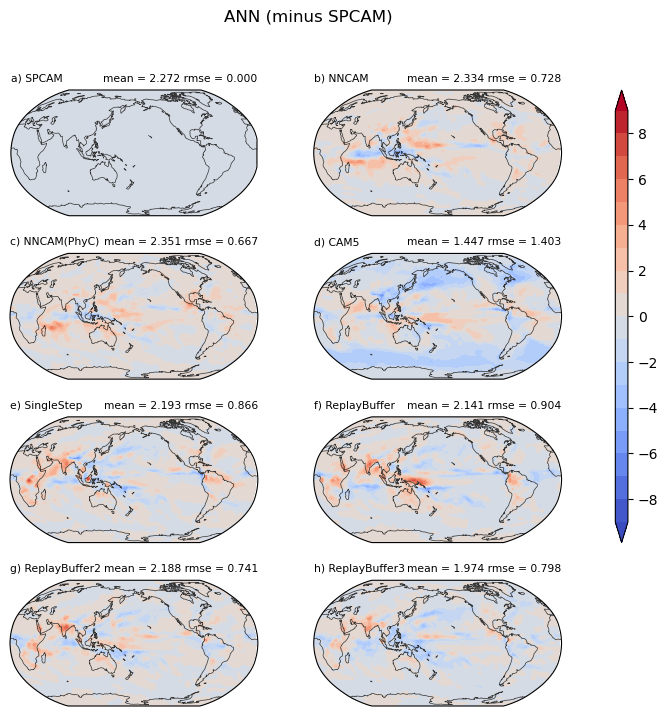

In [116]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
# color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
color_interval = list(np.arange(-9,10,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
# new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(all_precip[i*2+j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, all_precip[i*2+j].mean(axis=0)-all_precip[0].mean(axis=0), color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_precip[j].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_precip[j].mean(axis=0)-all_precip[0].mean(axis=0), color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    # j = 0
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_precip[ji].mean(axis=0), all_precip[0].mean(axis=0))
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_precip[ji].mean(axis=0)-all_precip[0].mean(axis=0), color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("ANN (minus SPCAM)")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/2306874498.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


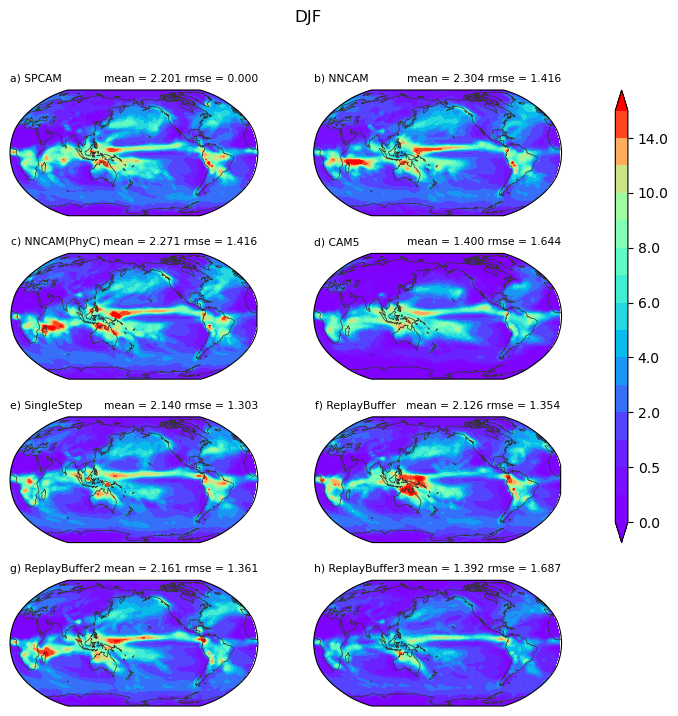

In [117]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
# new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(DJF_precip[i*2+j], DJF_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, DJF_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_djf[j], DJF_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, new_djf[j], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_djf[ji], DJF_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, new_djf[ji], color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("DJF")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/1009009002.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


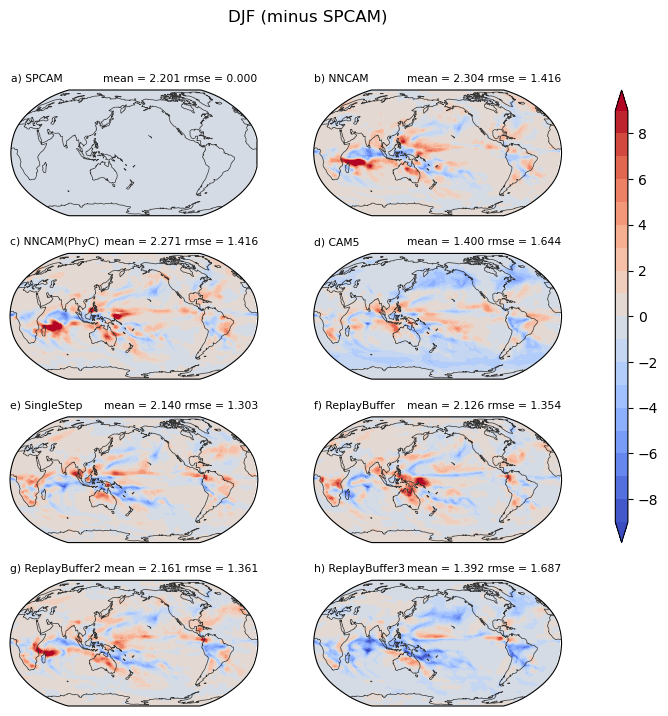

In [118]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(-9,10,1).astype(int)) # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2", "ReplayBuffer3"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(DJF_precip[i*2+j], DJF_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, DJF_precip[i*2+j]-DJF_precip[0], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_djf[j], DJF_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_djf[j]-DJF_precip[0], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_djf[ji], DJF_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_djf[ji]-DJF_precip[0], color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("DJF (minus SPCAM)")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/447789500.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


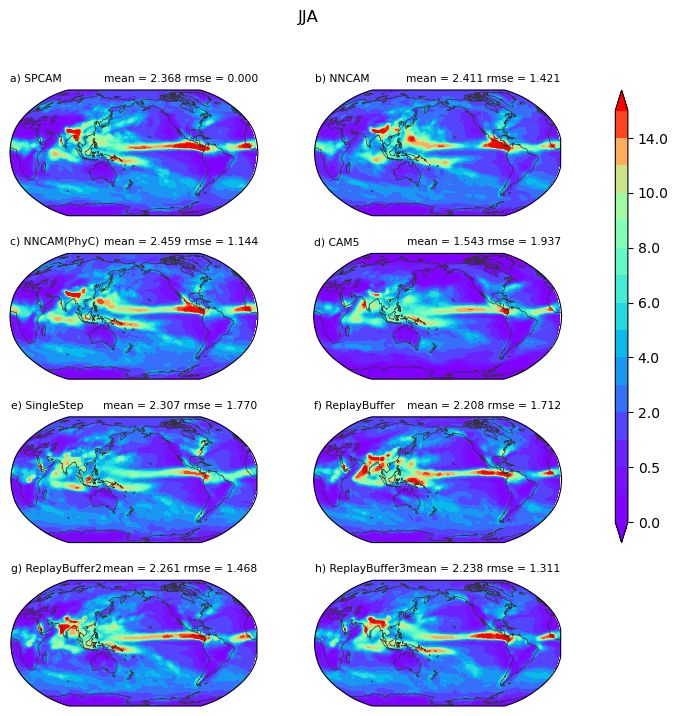

In [119]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}
new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2", "ReplayBuffer3"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(JJA_precip[i*2+j], JJA_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, JJA_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_jja[j], JJA_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, new_jja[j], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_jja[ji], JJA_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, new_jja[ji], color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

row col: 0 0
row col: 0 1
row col: 1 0
row col: 1 1


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/613868510.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


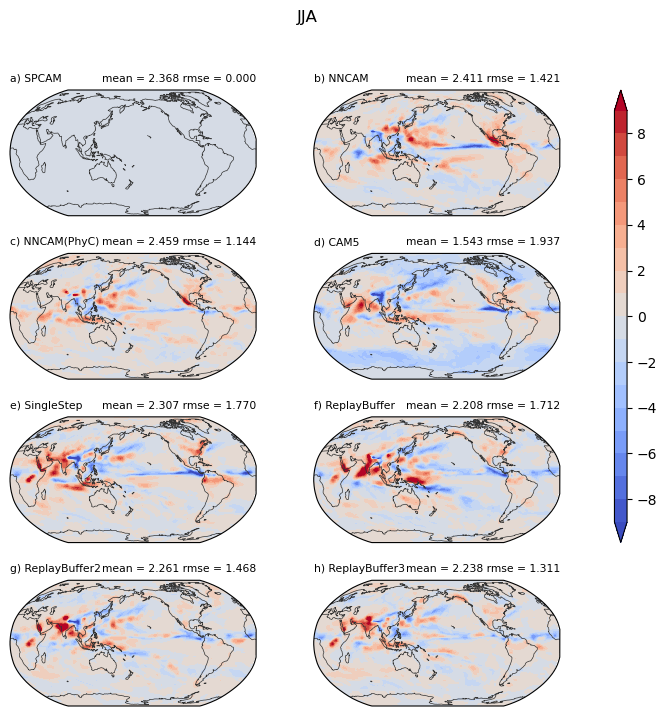

In [120]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = list(np.arange(-9,10).astype(int))
font = {'weight':'normal','size':7.75}
# new_exp_names = ["SingleStep", "ReplayBuffer", "ReplayBuffer2"]

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        print("row col:",i, j)
        mean, rmse = subtitle_val(JJA_precip[i*2+j], JJA_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, JJA_precip[i*2+j]-JJA_precip[0], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])
for i in range(2,3):
    for j in range(2):
        mean, rmse = subtitle_val(new_jja[j], JJA_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_jja[j]-JJA_precip[0], color_interval, font, new_exp_names[j], mean, rmse)#, [0,357.5,-90,90])
for i in range(3,4):
    for j in range(2):
        ji = 2+j
        mean, rmse = subtitle_val(new_jja[ji], JJA_precip[0])
        plot = plot_single_precip_diff(fig, gs, i*2+j+1, new_jja[ji]-JJA_precip[0], color_interval, font, new_exp_names[ji], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/970985608.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


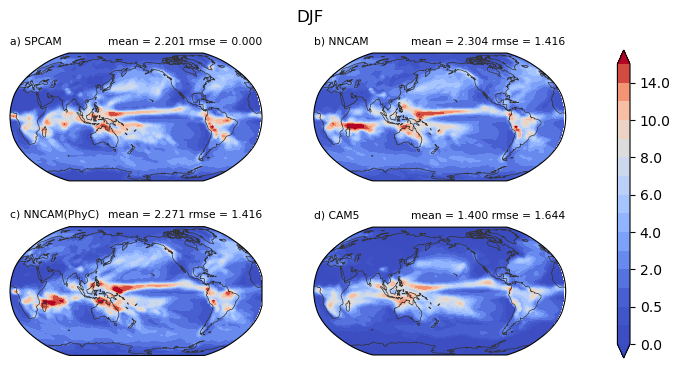

In [15]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(DJF_precip[i*2+j], DJF_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, DJF_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
fig.suptitle("DJF")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_56597/3962968403.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


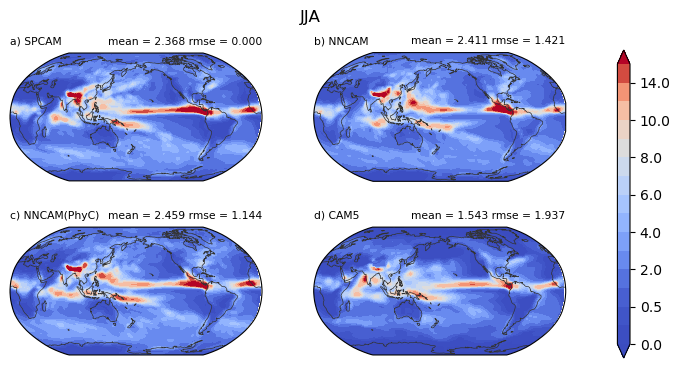

In [14]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], figure=fig)
gs.update(wspace=0.3, hspace=0.3)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(2):
    for j in range(2):
        mean, rmse = subtitle_val(JJA_precip[i*2+j], JJA_precip[0])
        plot = plot_single_precip(fig, gs, i*2+j+1, JJA_precip[i*2+j], color_interval, font, expname[i*2+j], mean, rmse)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[0:2, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)
fig.suptitle("JJA")
plt.tight_layout()
# plt.savefig('ann-multi_precipitation_plot.pdf')

In [26]:
temp_cp = precip[0].mean(axis=0)

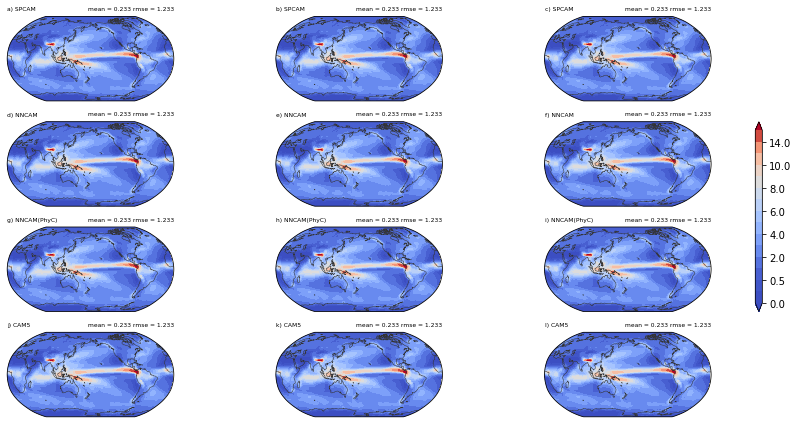

In [30]:
# 创建一个新的图形和一个 3x2 的网格
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.025], figure=fig)
# gs.update(wspace=0.05)#, hspace=0.25)
color_interval = [0, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 17] # 降水的非等距 color bar
font = {'weight':'normal','size':6}
# font = {'weight':'normal','size':7.75}

# 在每个格子上添加一个子图
for i in range(4):
    for j in range(3):
        plot = plot_single_precip(fig, gs, i*3+j+1, temp_cp, color_interval, font, expname[i], 0.233, 1.233)#, [0,357.5,-90,90])

cax = fig.add_subplot(gs[1:3, -1])
fig.colorbar(plot['cs0'], cax=cax, orientation='vertical', shrink = 0.7, pad=0.02)

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.savefig('3x4-multi_precipitation_plot.pdf')